# FE_연습

### Walmart Store Sales Prediction

In [8]:
#사용될 라이브러리들을 import합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#경고 문구 무시
import warnings
warnings.filterwarnings('ignore')

#matplotlib 스타일 정의
plt.style.use('fivethirtyeight')

In [9]:
#bureau.csv 파일을 import합니다.
walmart = pd.read_csv('/Users/siyounglee/Downloads/Walmart.csv')
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# 1. Imputing

Null값 비중부터 확인

In [17]:
walmart.isna().sum()/len(walmart)*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

Null값 없음 확인

# 2. Encoding

In [18]:
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

dtype이 object -> Date

In [19]:
walmart[['Date']]

,Date
0,05-02-2010
1,12-02-2010
2,19-02-2010
3,26-02-2010
4,05-03-2010
...,...
6430,28-09-2012
6431,05-10-2012
6432,12-10-2012
6433,19-10-2012


In [22]:
#object 데이터를 datetime 데이터로 변환
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart['Date']

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [23]:
# 데이터타입 확인
walmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

# 3. Outlier removing

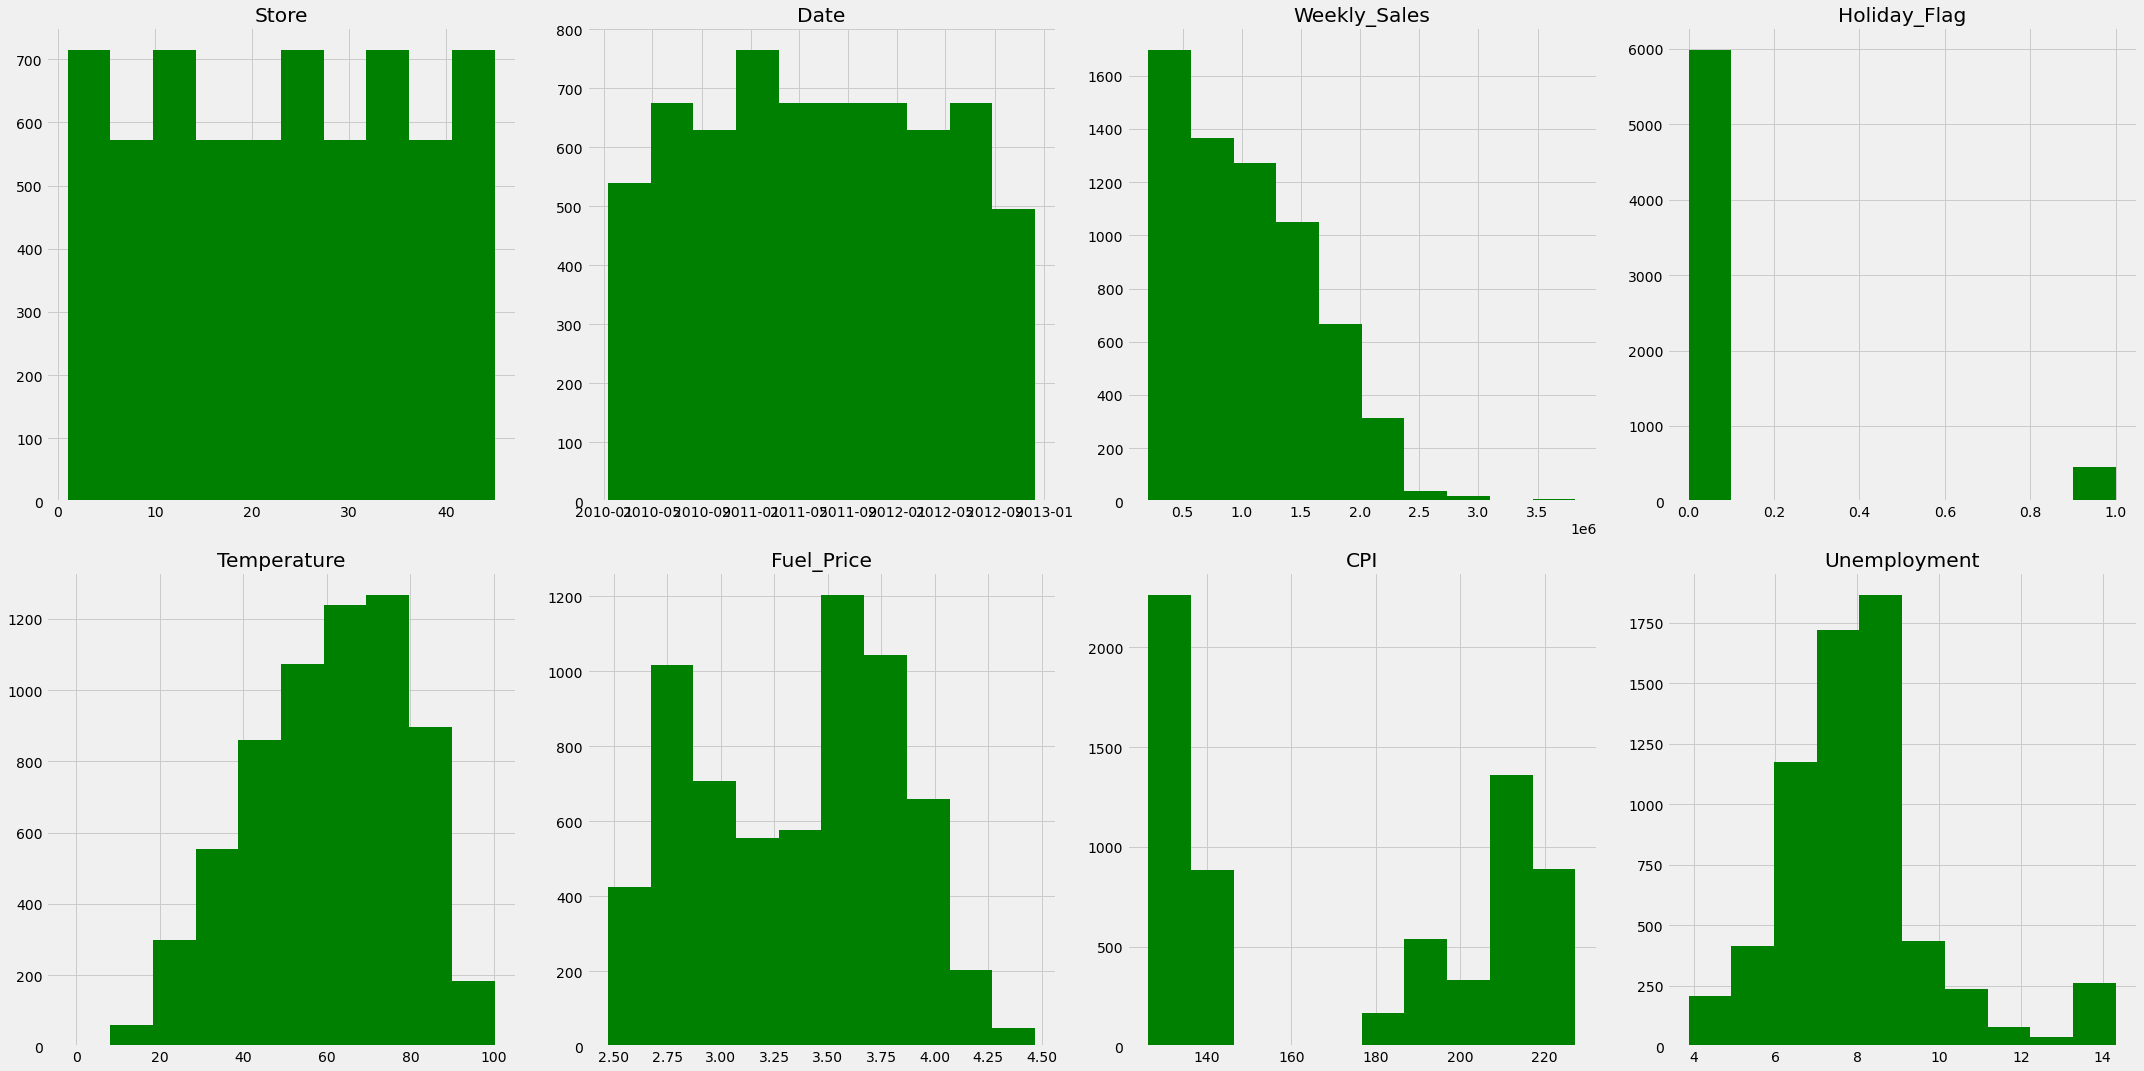

In [26]:
plt.figure(figsize=(30,30))
for i, col in enumerate(walmart.columns.to_list()):
    plt.subplot(4, 4, i + 1)
    plt.hist(walmart[col], label=col,color='green')
    plt.title(col)
    plt.tight_layout()

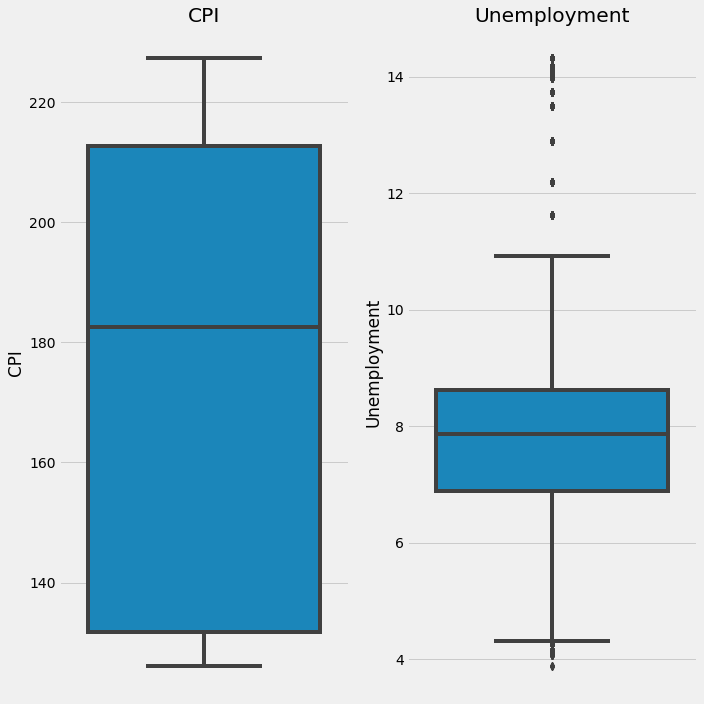

In [30]:
# outlier 의심 column 확인
plt.figure(figsize=(10, 10))
for i, col in enumerate(['CPI', 'Unemployment']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=walmart, y=col)
    plt.title(col)
    plt.tight_layout()

# 4. Correlation removing

<AxesSubplot:>

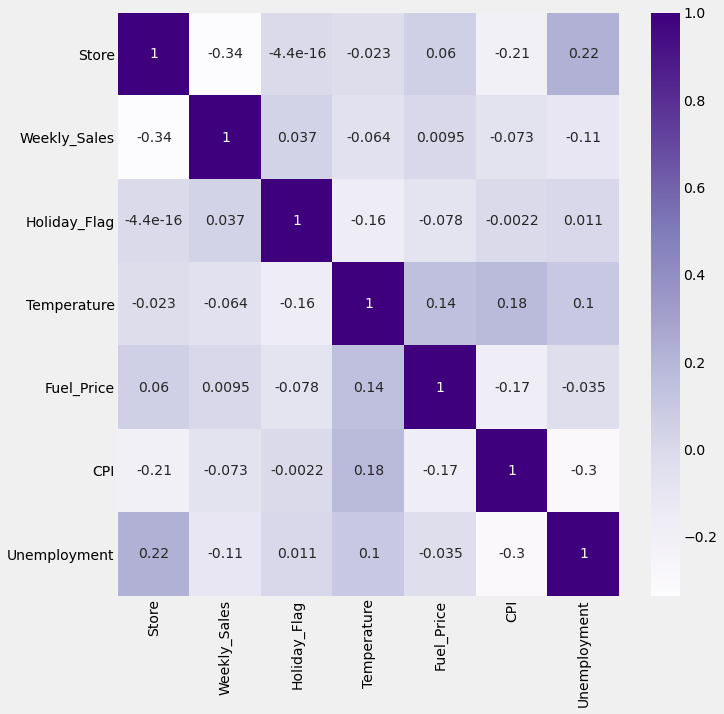

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(walmart.corr(), annot=True, cmap='Purples')

In [35]:
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
